# Part 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set seaborn default for plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetch and see data
data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
test_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [4]:
# check null values in data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked have missing values and we need to fix them

In [5]:
# describe a feature
def describeFeature(data, feature):
    print(data[feature].describe())
    print("\nnull count:")
    print(data['Age'].isnull().value_counts())

In [6]:
# define pie plot
def plotTotal(data, feature):
    categories = data[feature].value_counts()
    print(categories)
    categories.plot.pie(subplots=True)

In [7]:
# plot descriptive feature vs target feature
def plotFeatureToTarget(data, feature, target):
    survived = data[data[target]==1][feature].value_counts()
    dead = data[data[target]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='pie', figsize=(20,20), subplots=True, autopct='%1.0f%%')
    df.plot(kind='bar', figsize=(12,5), stacked=False)

In [8]:
# define histogram plot
def plotHistogram(data, feature, bins=10, kde=False):
    sns.distplot(a=data.dropna()[feature], bins=bins, kde=kde)

In [9]:
def plot2DHistogram(data, f1, f2, bins=10):
    sns.jointplot(x=data[f1], y=data[f2], kind="kde")

In [10]:
# ordinal feature vs target feature / with Factor feature as an option
def plotFactor(data, ordinal_feature, target, hue=None, col=None):
    sns.factorplot(ordinal_feature, target, hue=hue, col=col, data=data)

In [11]:
# plot categorical X continuous features To Categorical Target
def plotViolin(data, categorical_feature, continuous_feature, target):
    sns.violinplot(categorical_feature, continuous_feature, hue=target, data=data, split=True)

In [12]:
# plot continuous feature vs categorical target
def plotFacet(data, feature, target):
    facet = sns.FacetGrid(data, hue=target, aspect=3)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, data[feature].max()))
    facet.add_legend()
    plt.show()

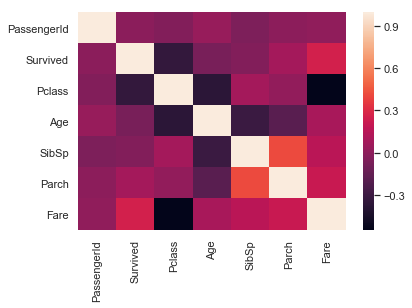

In [13]:
# visualizing correlation between attributes
corr = data.corr()
sns.heatmap(corr) # only appies to non categorical variables

### Types of Features

#### 1. Categorical Feature: Nominal 

categorical feature: a feature that has 1 or more categories and the categories are not sortable in a meaningful way (i.e. male > female ??)

#### 2. Categorical Feature: Ordinal

ordinal feature: categorical feature that has relative ordering for sorting. ex) height category: Tall > Medium > Short

#### 3. Continuous Feature

continuous feature can take values between any 2 points. ex) Fare

male      577
female    314
Name: Sex, dtype: int64


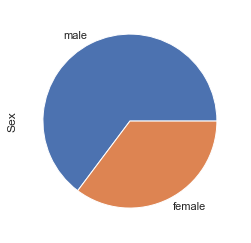

In [14]:
# Analyzing the features,

# first 'Sex' attribute // a Categorical Feature

plotTotal(data, 'Sex')

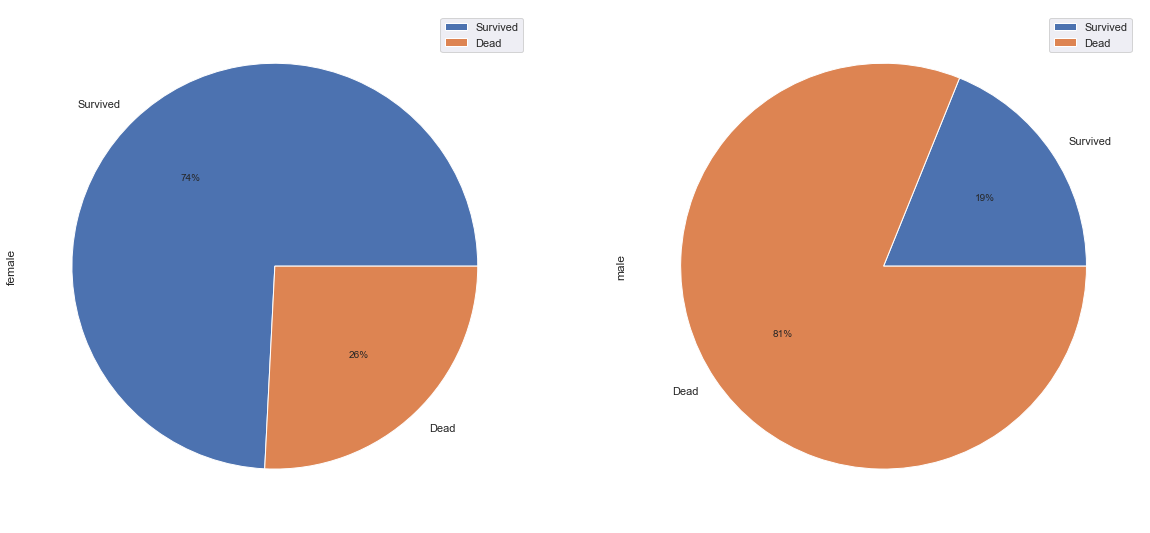

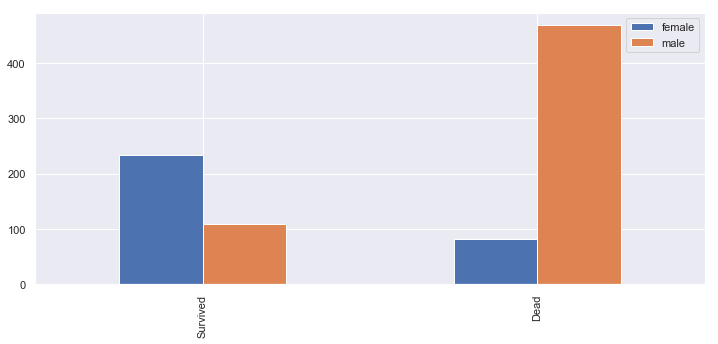

In [15]:
plotFeatureToTarget(data, 'Sex', 'Survived')

### 'Pclass' feature :: ordinal feature

3    491
1    216
2    184
Name: Pclass, dtype: int64


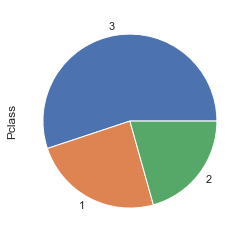

In [16]:
plotTotal(data, 'Pclass')

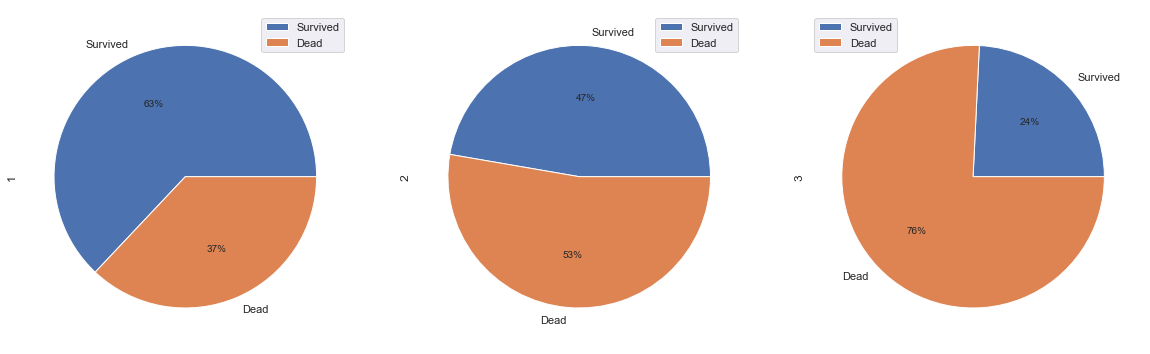

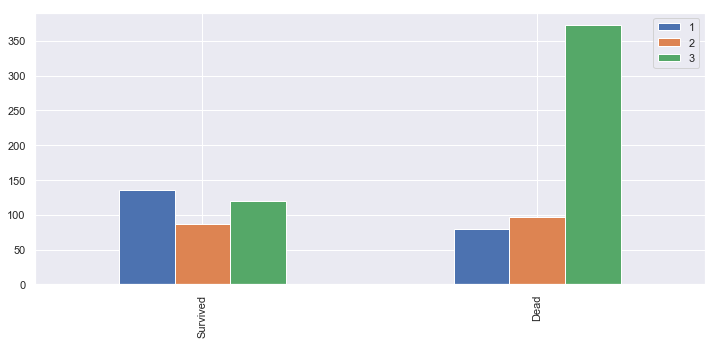

In [17]:
plotFeatureToTarget(data, 'Pclass', 'Survived')

looks like most people are in the Pclass: 3 category.
Survival rate is the highest in Pclass: 1 (63%)
Survival rate is the lowest in Pclass: 3  (24%)

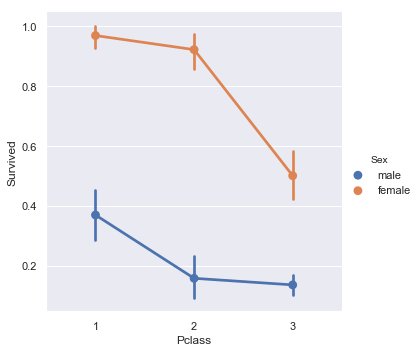

In [18]:
plotFactor(data, 'Pclass', 'Survived', 'Sex')

from the factorplot, we see that

female in Pclass:1 has 95% survival rate
generally, Pclass looks like a very important feature

### 'Age' feature :: continuous feature

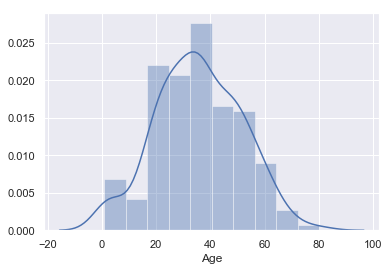

In [19]:
plotHistogram(data, 'Age', kde=True)

In [20]:
describeFeature(data, 'Age')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

null count:
False    714
True     177
Name: Age, dtype: int64


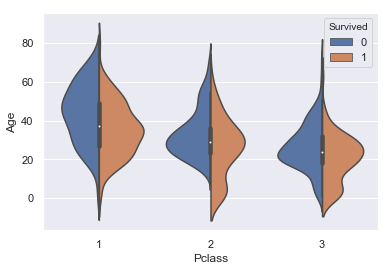

In [21]:
plotViolin(data, 'Pclass', 'Age', 'Survived')

the age factor decreases as Pclass increases from 1-->3

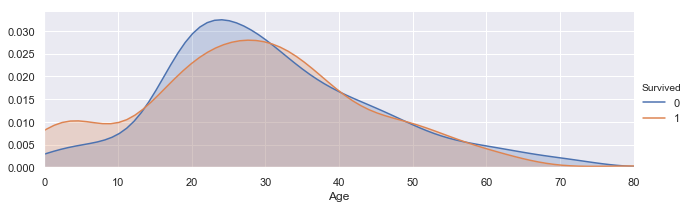

In [22]:
plotFacet(data, 'Age', 'Survived')

observation:
0~14 yrs old had significantly higher survival rate than death rate
14~30 yrs old had higher death rate than survival rate
30+ yrs old had somewhat similar survival vs death rate

In [23]:
describeFeature(data, 'Age')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

null count:
False    714
True     177
Name: Age, dtype: int64


'Age' feature has some significant missing values. We need to fill this up by using some mechanism.

We could use the Title (ex. Mr, Mrs, Miss, etc) to assign average age values to people with those titles.

In [24]:
# before making any changes, we should combine train and test data
train_test_data = [data, test_data]

In [25]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.')

In [26]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [27]:
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [28]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [29]:
pd.crosstab(data['Title'], data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


looks like there are some misspelled Titles like Mlle and Mme that stand for Miss. we can replace these.

also, we can replace Catp, Col --> Mr, because we know they are male

In [30]:
# doing some meaningful replacement
for dataset in train_test_data:
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Other'],inplace=True)

In [31]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [32]:
data.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [33]:
# filling in the missing ages
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'), inplace=True)

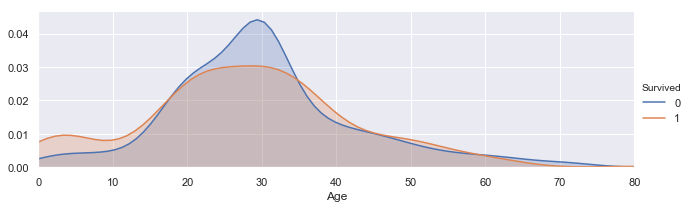

In [34]:
plotFacet(data, 'Age', 'Survived')

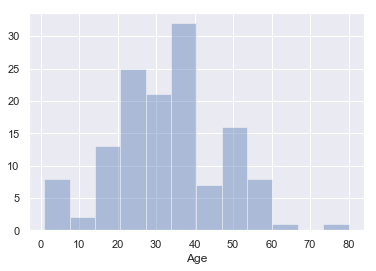

In [35]:
plotHistogram(data[data['Survived']==1], 'Age', bins=12)

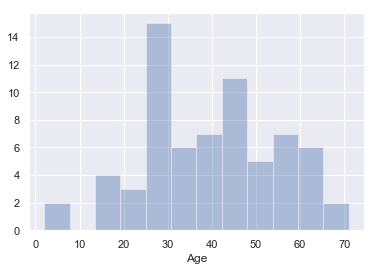

In [36]:
plotHistogram(data[data['Survived']==0], 'Age', bins=12)

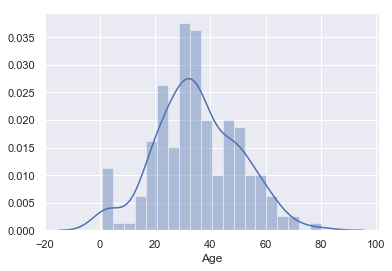

In [37]:
plotHistogram(data, 'Age', bins=20, kde=True)

In [38]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### 'Embarked' feature :: categorical value

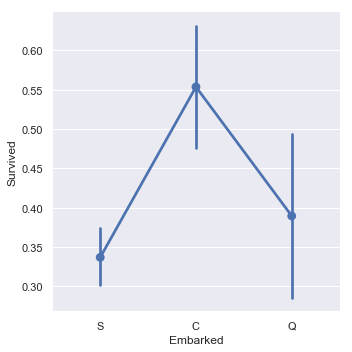

In [39]:
plotFactor(data, 'Embarked', 'Survived')

Looks like people who embarked from 'C' show the highest survival rate. would this be because many of the people from 'C' are rich and used the first Pclass?

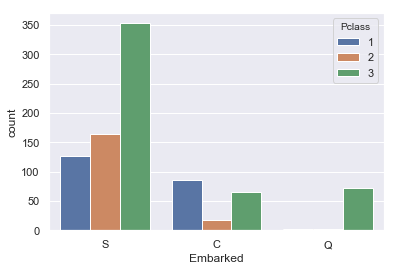

In [40]:
sns.countplot('Embarked', data=data, hue='Pclass')

observations: 
Most people onboarded from 'S'

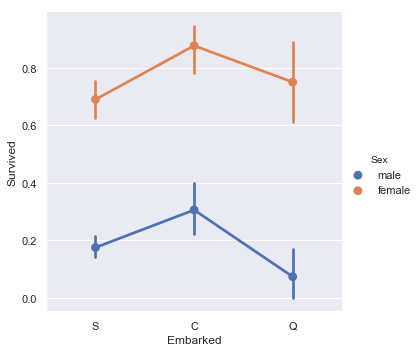

In [41]:
plotFactor(data, 'Embarked', 'Survived', 'Sex')

Filling in NaNs for Embarked

In [42]:
data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [43]:
data['Embarked'].fillna('S', inplace=True)

In [44]:
data['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [45]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

### next, 'SibSp' feature :: discrete feature (ordinal)

In [46]:
describeFeature(data, 'SibSp')

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

null count:
False    891
Name: Age, dtype: int64


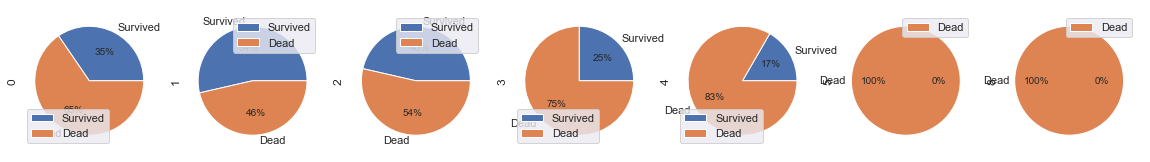

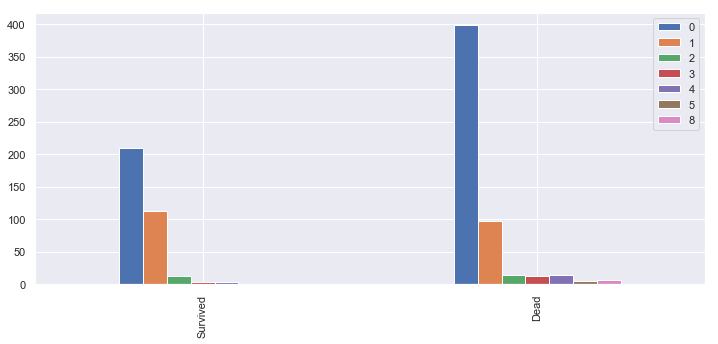

In [47]:
plotFeatureToTarget(data, 'SibSp', 'Survived')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


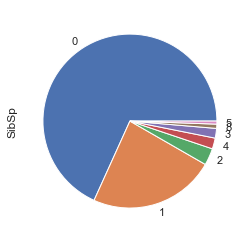

In [48]:
plotTotal(data, 'SibSp')

In [49]:
pd.crosstab(data['SibSp'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


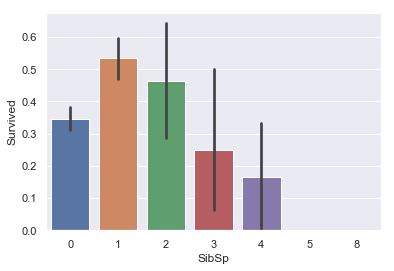

In [50]:
sns.barplot('SibSp', 'Survived', data=data)

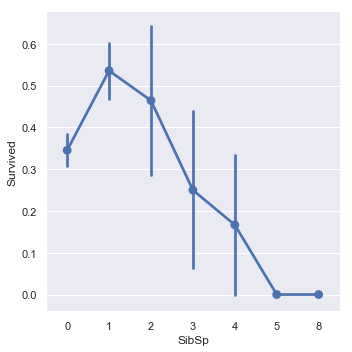

In [51]:
sns.factorplot('SibSp', 'Survived', data=data)

Survival rate is highest when SibSp=1 > 2 > 0 > 3 > 4 > ..
it decreases, pClass 5,6 have 0 percent survival rate, probably b/c of Pclass

### Parch: Nominal feature

In [52]:
describeFeature(data,'Parch')

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

null count:
False    891
Name: Age, dtype: int64


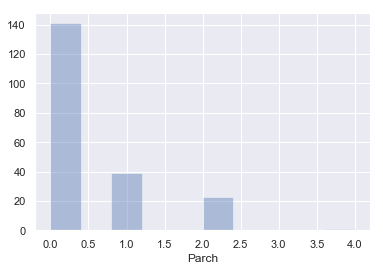

In [53]:
plotHistogram(data, 'Parch')

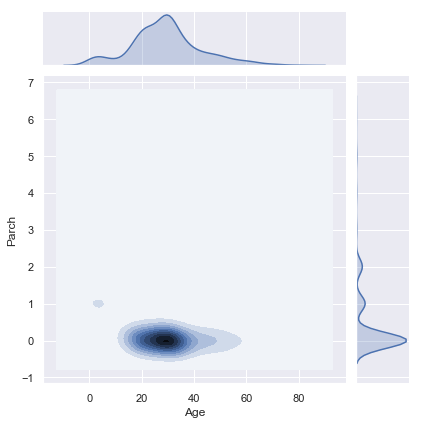

In [54]:
plot2DHistogram(data, 'Age', 'Parch')

looks like Parch=1 only applies to Age group 0~5.

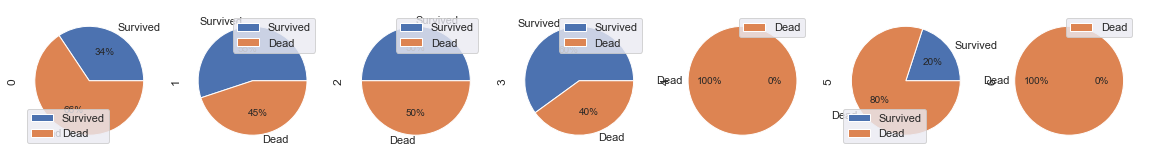

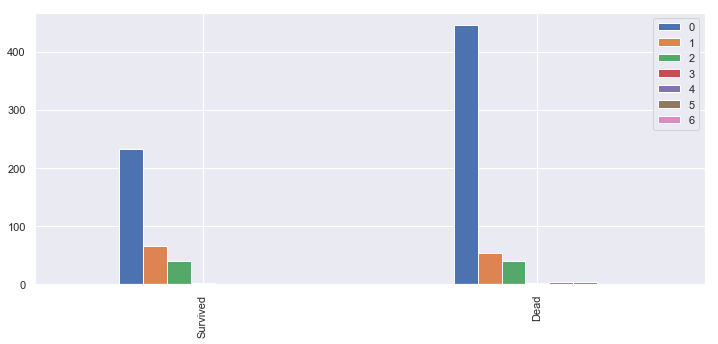

In [55]:
plotFeatureToTarget(data, "Parch", "Survived")

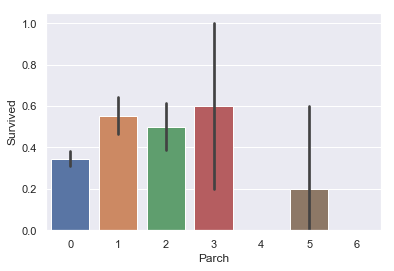

In [56]:
sns.barplot('Parch', 'Survived', data=data)

survival rate is highest with Parch = 3 > 1 > 2 > 0 > 5 > 4 == 6

### Fare :: continuous feature

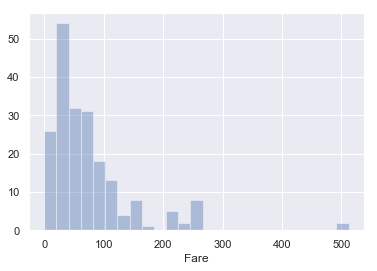

In [57]:
plotHistogram(data, 'Fare', bins=25)

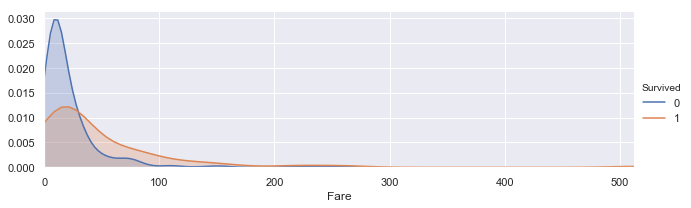

In [58]:
plotFacet(data, 'Fare', 'Survived')

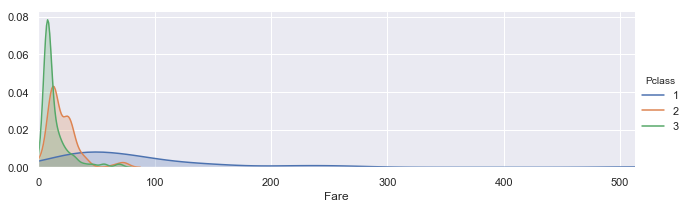

In [59]:
plotFacet(data, 'Fare', 'Pclass')

Observations in a nutshell

Sex: women is more likely to survive than men
Pclass: higher pclass shows higher survival rate
Age: children are likely to survive, 16~35 ish adults died a lot
Embarked: in terms of ratio, people who onboarded from 'C' are likely to have
pclass 1, thus the survival rate is high.
Parch+SibSp: having 1~2 SibSp and having 1~3 Parch shows higher chance of survival,
compared to traveling alone or as a large family.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [61]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


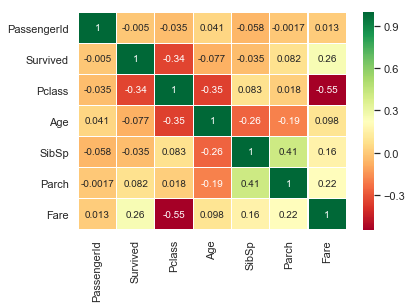

In [62]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

Heatmap interpretation

positive correlation: increase in A --> increase in B. Thus, they hold similar information
negative correlation: increase in A --> decrease in B. they hold negative similarity.

we should try to remove redundancy.

2 features that show highest correlation are SibSp and Parch. let's do something.

## Part 2: Feature Engineering and Data Cleaning

'Age' is a continuous feature. we need to convert this into categorical value
either by binning or by normaliszation.

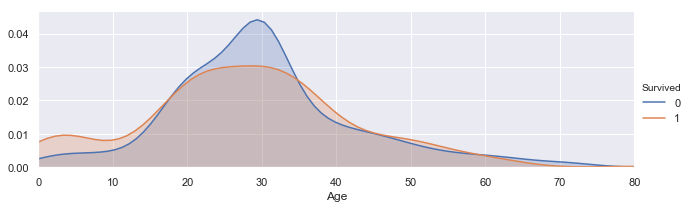

In [63]:
plotFacet(data, 'Age', 'Survived')

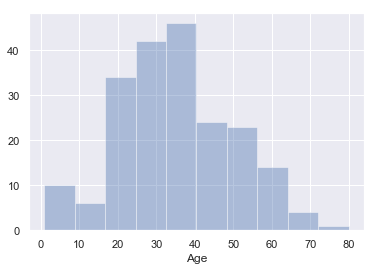

In [64]:
plotHistogram(data, 'Age')

In [65]:
data['Age'].describe()

count    891.000000
mean      29.391886
std       13.240506
min        0.420000
25%       21.500000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [66]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [67]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

In [68]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [69]:
data['Age'].value_counts()

1.0    502
2.0    205
0.0    104
3.0     69
4.0     11
Name: Age, dtype: int64

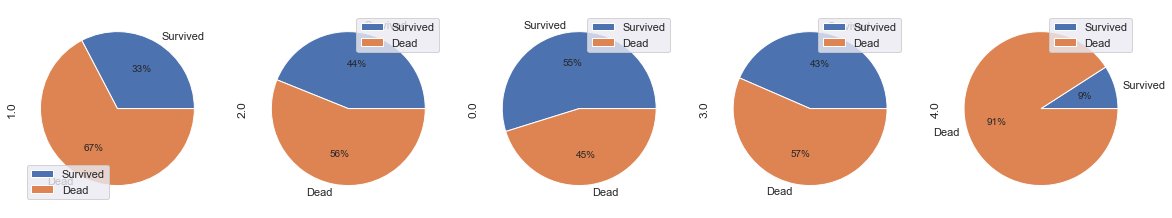

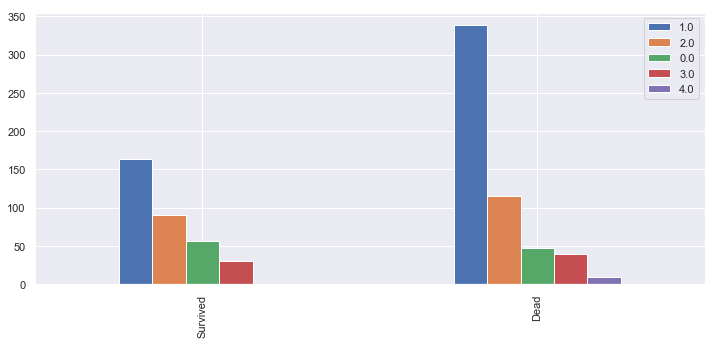

In [70]:
plotFeatureToTarget(data, 'Age', 'Survived')

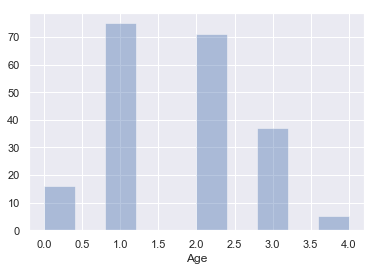

In [71]:
plotHistogram(data, 'Age')

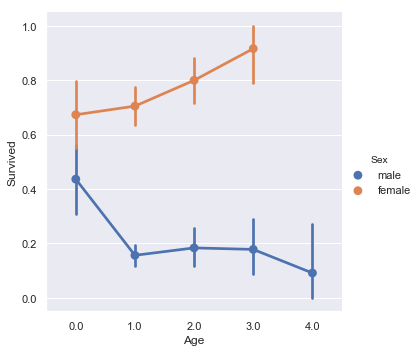

In [72]:
plotFactor(data, 'Age', 'Survived', hue='Sex')

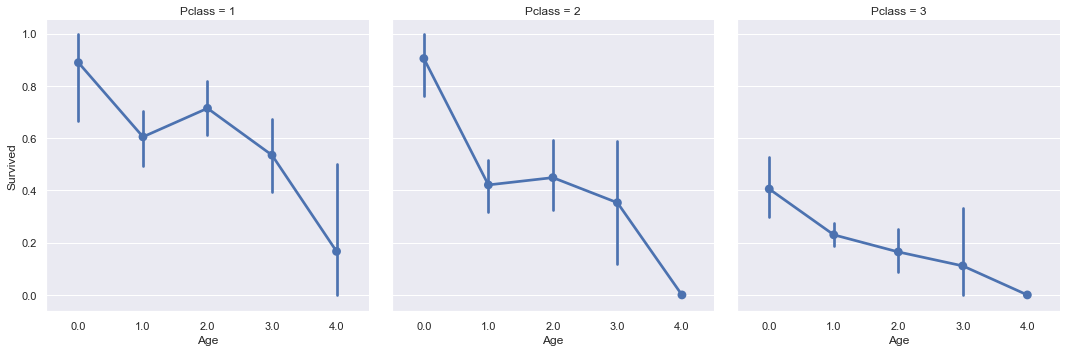

In [73]:
plotFactor(data, 'Age', 'Survived', col='Pclass')

In [74]:
for dataset in train_test_data:
    dataset.drop(['Name','Ticket'], axis=1, inplace=True)

In [75]:
for dataset in train_test_data:
    dataset['Sex_Group'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [76]:
for dataset in train_test_data:
    dataset.drop('Sex', axis=1, inplace=True)

In [77]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [78]:
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [79]:
# label title
for dataset in train_test_data:
    dataset['Title_Group'] = dataset['Title'].map({
        'Mr': 0,
        'Mrs': 1,
        'Miss': 2,
        'Master': 3,
        'Other': 4
    })
    dataset.drop('Title', axis=1, inplace=True)

In [80]:
# drop Cabin b/c a lot of NaN values
for dataset in train_test_data:
    dataset.drop('Cabin', axis=1, inplace=True)

In [81]:
for dataset in train_test_data:
    dataset['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

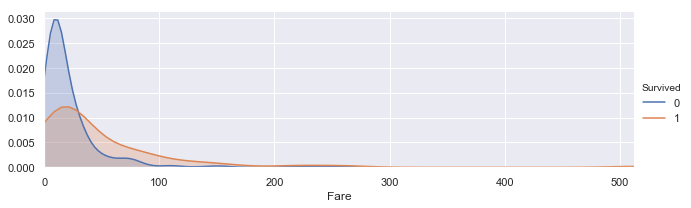

In [82]:
plotFacet(data, 'Fare', 'Survived')

In [83]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3
    

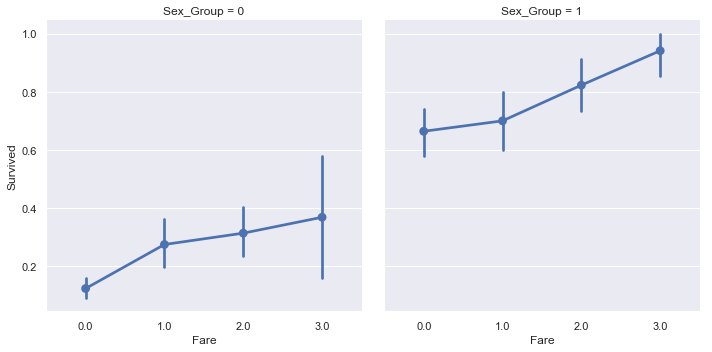

In [84]:
plotFactor(data, 'Fare', 'Survived', col='Sex_Group')

In [85]:
for dataset in train_test_data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

In [86]:
for dataset in train_test_data:
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [87]:
data.drop('PassengerId', axis=1, inplace=True)

In [88]:
dataset.head(20)

,PassengerId,Pclass,Age,Fare,Embarked,Sex_Group,Title_Group,Family
0,892,3,2.0,0.0,2,0,0,0
1,893,3,2.0,0.0,0,1,1,1
2,894,2,3.0,0.0,2,0,0,0
3,895,3,1.0,0.0,0,0,0,0
4,896,3,1.0,0.0,0,1,1,2
5,897,3,0.0,0.0,0,0,0,0
6,898,3,1.0,0.0,2,1,2,0
7,899,2,1.0,1.0,0,0,0,2
8,900,3,1.0,0.0,1,1,1,0
9,901,3,1.0,1.0,0,0,0,2


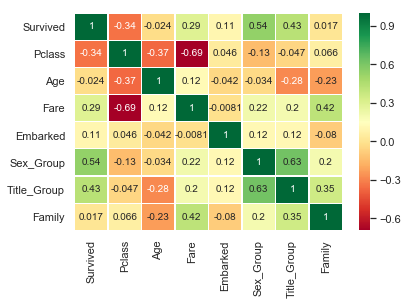

In [89]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

## Part 3: Predictive Modelling

We will use classification algorithms to make the prediction

1. Logistic regression
2. SVM (linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [90]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier

# utils
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [91]:
# splitting test data into train/validation set
train, validate = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
validate_X = validate[validate.columns[1:]]
validate_Y = validate[validate.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [92]:
train.shape, validate.shape

((623, 8), (268, 8))

In [93]:
# Radial Support Vector Machine (RBF-SVM)
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(validate_X)
print('Accuracy for rbf-SVM is ', metrics.accuracy_score(prediction1, validate_Y))

Accuracy for rbf-SVM is  0.835820895522388


In [94]:
# Linear SVM
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(validate_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, validate_Y))


Accuracy for linear SVM is  0.7910447761194029


In [95]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(validate_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,validate_Y))


The accuracy of the Logistic Regression is 0.8022388059701493


In [96]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(validate_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,validate_Y))


The accuracy of the Decision Tree is 0.8059701492537313


In [97]:
# KNN
model = KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5 = model.predict(validate_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,validate_Y))


The accuracy of the KNN is 0.8059701492537313


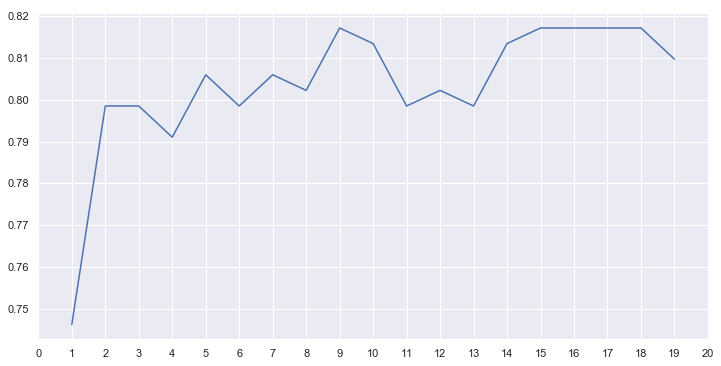

Accuracies for different values of n are: [0.74626866 0.79850746 0.79850746 0.79104478 0.80597015 0.79850746
 0.80597015 0.80223881 0.81716418 0.81343284 0.79850746 0.80223881
 0.79850746 0.81343284 0.81716418 0.81716418 0.81716418 0.81716418
 0.80970149] with the max value as  0.8171641791044776


In [98]:
# checking KNN with different N's
a_index=list(range(1,20))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in list(range(1,20)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction = model.predict(validate_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, validate_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())


In [99]:
# Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(validate_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,validate_Y))


The accuracy of the NaiveBayes is 0.8097014925373134


In [100]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(validate_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7, validate_Y))


The accuracy of the Random Forests is 0.8059701492537313


## Cross Validation

In [101]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [102]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]


In [103]:
for i in models:
    cv_result = cross_val_score(i, X, Y, cv = kfold, scoring="accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)  


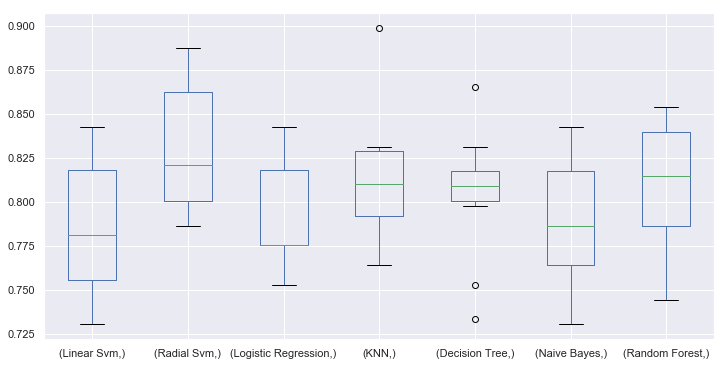

In [104]:
# plotting the result
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

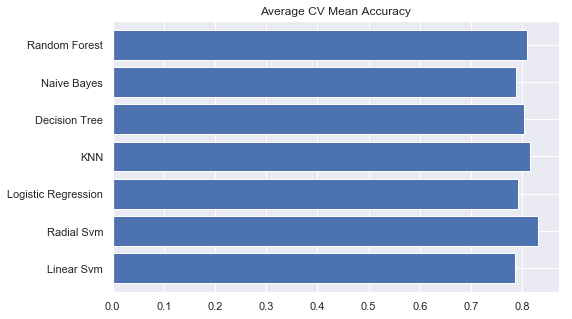

In [105]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

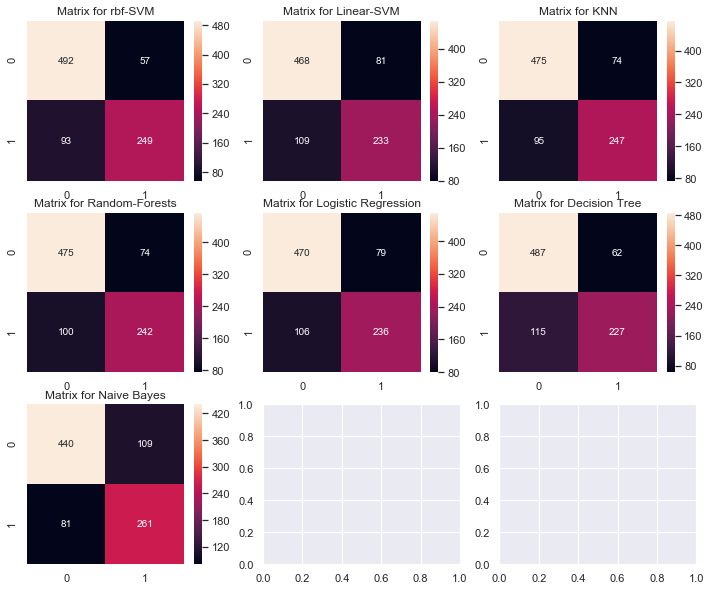

In [106]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

let's tune the hyper-parameters for the 2 best classfiers
1. radial SVM
2. Random Forest

In [107]:
from sklearn.model_selection import GridSearchCV

C = [x/10 for x in range(1,11)]
gamma = [x/10 for x in range(1,11)]
kernel=['rbf','linear']

hyper={'kernel':kernel,'C':C,'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316498316498316
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   11.4s finished


Above was the best combination

gamma = 0.1
kernel = 'rbf'
C = 1

In [108]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   19.5s finished


0.8103254769921436
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


best n_estimator = 200

## Ensembling

ensembling is a good way to increase the accuracy or performance of a model. It uses combination of various simple models to create a powerful model.

Ensembling can be done in ways like:

1. voting classifier
2. bagging
3. boosting

### 1. Voting Classifier

Voting classifier gives an average prediction result based on the prediction of all the submodels. The submodels or aka basemodels are all of different types.

In [109]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=1.0,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=200,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(validate_X,validate_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.832089552238806
The cross validated score is 0.8237912836227442


### 2. Bagging

Bagging is a gneral ensemble method.
It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance.
Unlike voting classifier, bagging makes use of similar classifiers.

#### Bagged KNN
bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n-neighbours, as small value of n_neighbours

In [110]:
from sklearn.ensemble import BaggingClassifier

# bagged KNN where n=3
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(validate_X)

print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction,validate_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.8134328358208955
The cross validated score for bagged KNN is: 0.8115185563500171


In [111]:
# bagged Decision Tree

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(validate_X)

print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction, validate_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8097014925373134
The cross validated score for bagged Decision Tree is: 0.8048025195778005


### Boosting

boosting is an ensembling technique which uses sequential learning of classifiers.
It is a step by step enhancement of a weak model.

Boosting works as follows:

a model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process is continuous and new classifiers are added to the model until the limit is reached on the accuracy.

#### AdaBoost (Adaptive Boosting)
The weak learner or estimator in this case is a decision tree.
but we can change the default base_estimator to any algo of our choice.

In [112]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated svcore for AdaBoost is:', result.mean())

The cross validated svcore for AdaBoost is: 0.826038758370219


#### Stochastic Gradient Boosting
here as well, the weak learner is a decision tree

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8059139144251504


#### XGBoost

In [114]:
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8125802973555784


Since we got the highest accuracy with AdaBoost, lets try to increase its accuracy with hyper parameter tuning!

In [115]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.02, 0.05, 0.1,0.2,0.3]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.2min finished


0.8260381593714927
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.02, n_estimators=500, random_state=None)


The maximum accuracy we can get with AdaBoost is 82.6% with n_estimators=500 and learning_rate=0.02


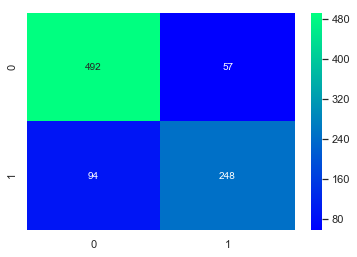

In [116]:
ada=AdaBoostClassifier(n_estimators=500,random_state=0,learning_rate=0.02)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

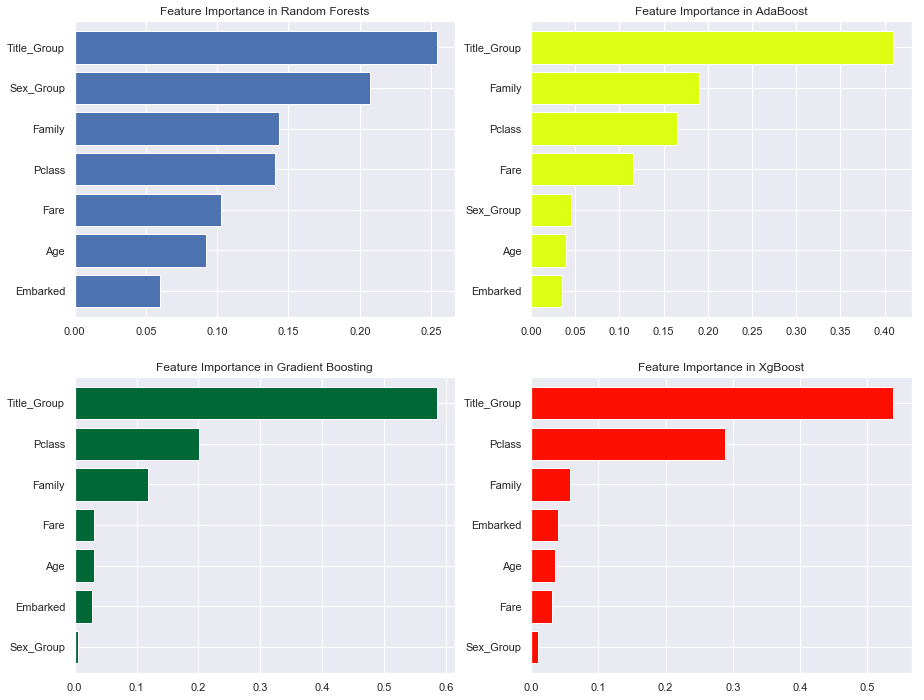

In [117]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

Observations:
1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

# Actual Testing with final model

In [118]:
# just filling in the final missing value
test_data['Fare'].fillna(test_data.groupby('Title_Group')['Fare'].transform('median'), inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null int64
Sex_Group      418 non-null int64
Title_Group    418 non-null int64
Family         418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [119]:
test_data.head()

,PassengerId,Pclass,Age,Fare,Embarked,Sex_Group,Title_Group,Family
0,892,3,2.0,0.0,2,0,0,0
1,893,3,2.0,0.0,0,1,1,1
2,894,2,3.0,0.0,2,0,0,0
3,895,3,1.0,0.0,0,0,0,0
4,896,3,1.0,0.0,0,1,1,2


In [120]:
test_index = test_data['PassengerId']
test_data.drop('PassengerId', axis=1, inplace=True)

In [121]:
adaBoostModel = AdaBoostClassifier(n_estimators=500,random_state=0,learning_rate=0.02)

adaBoostModel.fit(X, Y)

test_prediction = adaBoostModel.predict(test_data)

In [122]:
test_prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
submission = pd.DataFrame({
    "PassengerId": test_index,
    "Survived": test_prediction
})
submission.to_csv('submission.csv', index=False)

submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
